In [17]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import model_from_json
from sklearn.preprocessing import LabelBinarizer
import os
from imutils import paths
from tqdm import tqdm
from matplotlib.pyplot import imshow
import splitfolders
from tensorflow.keras.callbacks import EarlyStopping

from urllib.request import urlopen
from zipfile import ZipFile

In [18]:
input_folder="./dataset/originalDataset"
output_folder="./dataset/projectDataset"

In [19]:
if(os.path.exists("./dataset/projectDataset/train")):
    print("Dataset already Downloaded")
else:
    # Download the dataset zip file from github and extract into local repo
    zipurl = "https://media.githubusercontent.com/media/chyavanphadke/Classification_of_flower_images/main/dataset/originalDataset.zip"
    zipresp = urlopen(zipurl)
    tempzip = open("./tempdatasetdownload.zip", "wb")
    tempzip.write(zipresp.read())
    tempzip.close()
    zf = ZipFile("./tempdatasetdownload.zip")
    zf.extractall(path = './dataset/')
    zf.close()
    splitfolders.ratio(input_folder,output=output_folder,seed=42,ratio=(0.7,0.2,0.1),group_prefix=None);
    !rm -rf /content/tempdatasetdownload.zip

Dataset already Downloaded


In [20]:
train_path = "./dataset/projectDataset/train"
#dataset path

In [21]:
# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing, etc.
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen.fill_mode='constant'
train_datagen.horizontal_flip=True
train_datagen.zoom_range=[0.8, 1.2]
train_datagen.rotation_range=20
train_datagen.shear_range=10
train_datagen.brightness_range = [0.75, 1.5]


#making image as 227X227 for input of alexnet
train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical')

Found 3019 images belonging to 5 classes.


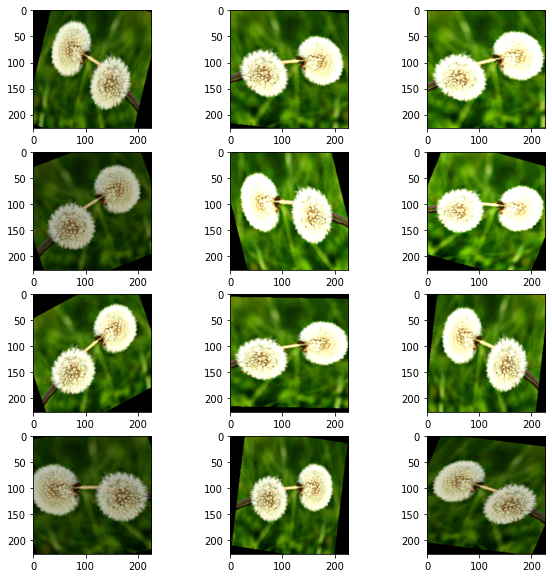

In [22]:
fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train[1][0][0])
axs[0][1].imshow(train[1][0][0])
axs[0][2].imshow(train[1][0][0])
axs[1][0].imshow(train[1][0][0])
axs[1][1].imshow(train[1][0][0])
axs[1][2].imshow(train[1][0][0])
axs[2][0].imshow(train[1][0][0])
axs[2][1].imshow(train[1][0][0])
axs[2][2].imshow(train[1][0][0])
axs[3][0].imshow(train[1][0][0])
axs[3][1].imshow(train[1][0][0])
axs[3][2].imshow(train[1][0][0])

In [23]:
from keras.models import Sequential

model = Sequential()

# first convolutional layer with filters=96, kernal size=11X11, starides=4 named as "conv0"
# relu activation function will make negative values as zero
model.add(Conv2D(96, (11, 11), strides=(4,4), padding='same', activation='relu', input_shape=(227, 227, 3)))
# max pooling with filter size=3X3, and starides=2 named as "max0"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# second convolutional layer with filters=256, kernal size=5X5, named as "conv1"
    # we are using padding='same' which means we do not want to drop any right most columns
    # so we will add 0 to fit our kernal to the input
    # relu activation function will make negative values as zero
    # max pooling with filter size=3X3, and starides=2 named as "max1"
model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))


model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))


# flatten the input feature map. here it flattens the last feature map before it
model.add(Flatten())


# add FC layers. Using less no. of neurons here
model.add(Dense(384, activation='relu'))
model.add(Dense(384, activation='relu'))

# add FC layer with 10 units for we have 10 classes
# use softmax activation for classification
model.add(Dense(5, activation='softmax'))

In [24]:
from keras.models import Model
### Training 
from keras.layers import Activation, MaxPooling2D
from keras.models import Sequential
# Define A Training Model
model = Sequential()
# YOUR_CODE HERE
model.add(Conv2D(32, (3, 3), input_shape=(227, 227, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 225, 225, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 225, 225, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 110, 110, 64)      18496     
                                                                 
 activation_6 (Activation)   (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

In [25]:
# printing summary of model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 225, 225, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 225, 225, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 110, 110, 64)      18496     
                                                                 
 activation_6 (Activation)   (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

In [26]:
epochsCount = 1000

from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

In [27]:
# compiling model
model.compile(optimizer = sgd , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [29]:
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

In [ ]:
# training our model
# we are using .fit method instead of .fit_generator because we have tensorflow 2.4.0
hist = model.fit(train,callbacks=[monitor], epochs=epochsCount)

Epoch 1/1000
95/95 [==============================] - 38s 391ms/step - loss: 1.5357 - accuracy: 0.2948
Epoch 2/1000
95/95 [==============================] - 37s 388ms/step - loss: 1.3445 - accuracy: 0.4299
Epoch 3/1000
95/95 [==============================] - 37s 387ms/step - loss: 1.2137 - accuracy: 0.4876
Epoch 4/1000
95/95 [==============================] - 37s 387ms/step - loss: 1.1519 - accuracy: 0.5247
Epoch 5/1000
95/95 [==============================] - 37s 388ms/step - loss: 1.1208 - accuracy: 0.5515
Epoch 6/1000
95/95 [==============================] - 37s 387ms/step - loss: 1.0879 - accuracy: 0.5585
Epoch 7/1000
95/95 [==============================] - 37s 389ms/step - loss: 1.0634 - accuracy: 0.5903
Epoch 8/1000
95/95 [==============================] - 37s 388ms/step - loss: 1.0396 - accuracy: 0.5916
Epoch 9/1000
95/95 [==============================] - 37s 390ms/step - loss: 1.0356 - accuracy: 0.5949
Epoch 10/1000
95/95 [==============================] - 37s 389ms/step - l

In [ ]:
import matplotlib.pyplot as plt
N = np.arange(0, epochsCount)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, hist.history['loss'], label='train_loss')
plt.plot(N, hist.history['accuracy'], label='train_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
# loading validation data
path_test = "./dataset/projectDataset/val"
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

In [ ]:
test_steps_per_epoch = np.math.ceil(test.samples / test.batch_size)

predictions = model.predict(test, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
true_classes = test.classes
class_labels = list(test.class_indices.keys())

In [ ]:
# checking cross validation accuracy/test accuracy
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
import sklearn.metrics as metrics

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [ ]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

In [ ]:
import seaborn as sns
class_names=["daisy","dandelion","rose","sunflower","tulip"]
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
# loading prediction data

path_pred = "./dataset/projectDataset/test"
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_pred, target_size=(227,227),class_mode='categorical')

In [ ]:
predictions = model.predict(predict)

In [ ]:
def get_category(predicted_output):
    path1 ="./dataset/projectDataset/train"
    return os.listdir(path1)[np.argmax(predicted_output)]

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))
axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))
axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))
axs[1][0].imshow(predict[4][0][0])
axs[1][0].set_title(get_category(predictions[4]))
axs[1][1].imshow(predict[5][0][0])
axs[1][1].set_title(get_category(predictions[5]))
axs[1][2].imshow(predict[6][0][0])
axs[1][2].set_title(get_category(predictions[6]))


plt.show()